In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")  # Đây là style tương đương bạn cần


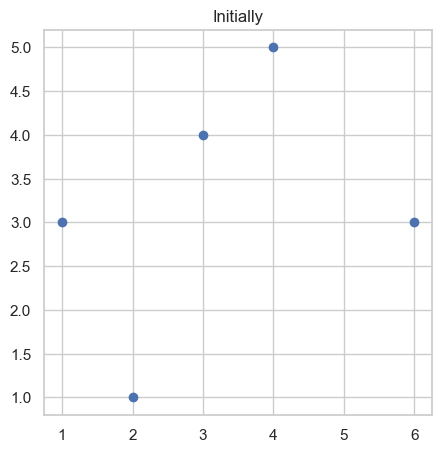

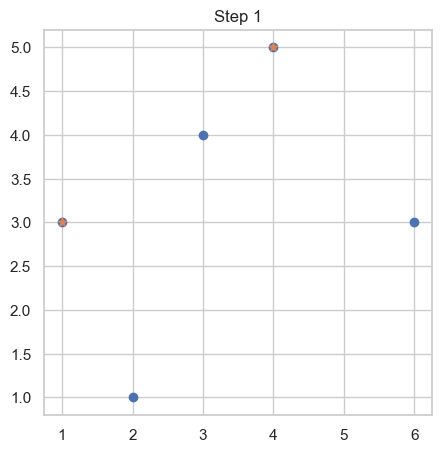

In [5]:
data = [(1,3),(4,5),(6,3),(3,4),(2,1)]

points = np.array(data)

# print(points)

plt.figure(figsize=(5,5))
plt.scatter(x=points[:,0],y = points[:,1])
plt.title("Initially")
plt.show()

k = 2
c1 = points[0]
c2 = points[1]

plt.figure(figsize=(5,5))
plt.scatter(x=points[:,0],y = points[:,1])
plt.scatter([c1[0],c2[0]],[c1[1],c2[1]],marker="*")
plt.title("Step 1")
plt.show()

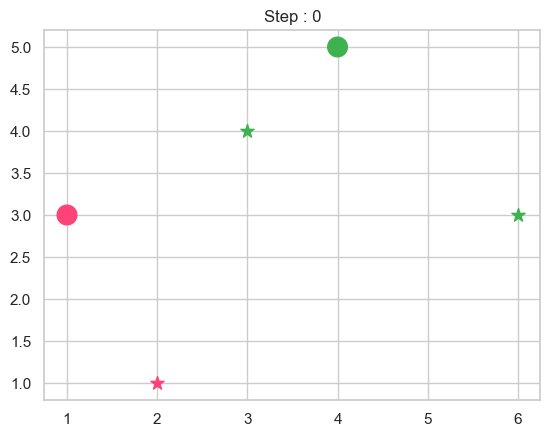

No changes.


In [27]:
def manhattan(p1, p2):
    return np.abs((p1[0]-p2[0])) + np.abs((p1[1]-p2[1]))

def get_costs(data, medoids):
    clusters = {i:[] for i in range(len(medoids))}
    cst = 0
    for d in data:
        dst = np.array([manhattan(d, md) for md in medoids])
        c = dst.argmin()
        clusters[c].append(d)
        cst+=dst.min()
        
    clusters = {k:np.array(v) for k,v in clusters.items()}
    return clusters, cst       
def KMedoids(data, k, iters = 100):
    medoids = np.array([data[i] for i in range(k)])
    samples,_ = data.shape
    
    clusters, cost = get_costs(data, medoids)
    count = 0
    
    colors =  np.array(np.random.randint(0, 255, size =(k, 4)))/255
    colors[:,3]=1
    
    plt.title(f"Step : 0")
    [plt.scatter(clusters[t][:, 0], clusters[t][:, 1], marker="*", s=100,
                                    color = colors[t]) for t in range(k)]
    plt.scatter(medoids[:, 0], medoids[:, 1], s=200, color=colors)
    plt.show()
    
    while True:
        swap = False
        for i in range(samples):
            if not i in medoids:
                for j in range(k):
                    tmp_meds = medoids.copy()
                    tmp_meds[j] = i
                    clusters_, cost_ = get_costs(data, tmp_meds)
                    
                    if cost_<cost:
                        medoids = tmp_meds
                        cost = cost_
                        swap = True
                        clusters = clusters_
                        print(f"Medoids Changed to: {medoids}.")
                        plt.title(f"Step : {count+1}")  
                        [plt.scatter(clusters[t][:, 0], clusters[t][:, 1], marker="*", s=100,
                                    color = colors[t]) for t in range(k)]
                        plt.scatter(medoids[:, 0], medoids[:, 1], s=200, color=colors)
                        plt.show()
        count+=1
        
        if count>=iters:
            print("End of the iterations.")
            break
        if not swap:
            print("No changes.")
            break
                       
KMedoids(points,2)   

In [22]:
class KMedoidsClass:
    def __init__(self,data,k,iters):
        self.data= data
        self.k = k
        self.iters = iters
        self.medoids = np.array([data[i] for i in range(self.k)])
        self.colors = np.array(np.random.randint(0, 255, size =(self.k, 4)))/255
        self.colors[:,3]=1

In [24]:
  def manhattan(self,p1, p2):
        return np.abs((p1[0]-p2[0])) + np.abs((p1[1]-p2[1]))

In [26]:
 def get_costs(self, medoids):
        tmp_clusters = {i:[] for i in range(len(medoids))}
        cst = 0
        for d in self.data:
            dst = np.array([self.manhattan(d, md) for md in medoids])
            c = dst.argmin()
            tmp_clusters[c].append(d)
            cst+=dst.min()

        tmp_clusters = {k:np.array(v) for k,v in tmp_clusters.items()}
        return tmp_clusters, cst


In [25]:
 def fit(self):
        
        samples,_ = self.data.shape

        self.clusters, cost = self.get_costs(data=self.data, medoids=self.medoids)
        count = 0
        

        colors =  np.array(np.random.randint(0, 255, size =(self.k, 4)))/255
        colors[:,3]=1

        plt.title(f"Step : 0")
        [plt.scatter(self.clusters[t][:, 0], self.clusters[t][:, 1], marker="*", s=100,
                                        color = colors[t]) for t in range(self.k)]
        plt.scatter(self.medoids[:, 0], self.medoids[:, 1], s=200, color=colors)
        plt.show()

        while True:
            swap = False
            for i in range(samples):
                if not i in self.medoids:
                    for j in range(self.k):
                        tmp_meds = self.medoids.copy()
                        tmp_meds[j] = i
                        clusters_, cost_ = self.get_costs(data=self.data, medoids=tmp_meds)

                        if cost_<cost:
                            self.medoids = tmp_meds
                            cost = cost_
                            swap = True
                            self.clusters = clusters_
                            print(f"Medoids Changed to: {self.medoids}.")
                            plt.title(f"Step : {count+1}")  
                            [plt.scatter(self.clusters[t][:, 0], self.clusters[t][:, 1], marker="*", s=100,
                                        color = colors[t]) for t in range(self.k)]
                            plt.scatter(self.medoids[:, 0], self.medoids[:, 1], s=200, color=colors)
                            plt.show()
            count+=1

            if count>=self.iters:
                print("End of the iterations.")
                break
            if not swap:
                print("No changes.")
                break



In [15]:
class KMedoidsClass:
    def __init__(self,data,k,iters):
        self.data= data
        self.k = k
        self.iters = iters
        self.medoids = np.array([data[i] for i in range(self.k)])
        self.colors = np.array(np.random.randint(0, 255, size =(self.k, 4)))/255
        self.colors[:,3]=1
    
    def manhattan(self,p1, p2):
        return np.abs((p1[0]-p2[0])) + np.abs((p1[1]-p2[1]))
        
    def get_costs(self, medoids, data):
        tmp_clusters = {i:[] for i in range(len(medoids))}
        cst = 0
        for d in data:
            dst = np.array([self.manhattan(d, md) for md in medoids])
            c = dst.argmin()
            tmp_clusters[c].append(d)
            cst+=dst.min()

        tmp_clusters = {k:np.array(v) for k,v in tmp_clusters.items()}
        return tmp_clusters, cst
    
    def fit(self):
        
        samples,_ = self.data.shape

        self.clusters, cost = self.get_costs(data=self.data, medoids=self.medoids)
        count = 0
        

        colors =  np.array(np.random.randint(0, 255, size =(self.k, 4)))/255
        colors[:,3]=1

        plt.title(f"Step : 0")
        [plt.scatter(self.clusters[t][:, 0], self.clusters[t][:, 1], marker="*", s=100,
                                        color = colors[t]) for t in range(self.k)]
        plt.scatter(self.medoids[:, 0], self.medoids[:, 1], s=200, color=colors)
        plt.show()

        while True:
            swap = False
            for i in range(samples):
                if not i in self.medoids:
                    for j in range(self.k):
                        tmp_meds = self.medoids.copy()
                        tmp_meds[j] = i
                        clusters_, cost_ = self.get_costs(data=self.data, medoids=tmp_meds)

                        if cost_<cost:
                            self.medoids = tmp_meds
                            cost = cost_
                            swap = True
                            self.clusters = clusters_
                            print(f"Medoids Changed to: {self.medoids}.")
                            plt.title(f"Step : {count+1}")  
                            [plt.scatter(self.clusters[t][:, 0], self.clusters[t][:, 1], marker="*", s=100,
                                        color = colors[t]) for t in range(self.k)]
                            plt.scatter(self.medoids[:, 0], self.medoids[:, 1], s=200, color=colors)
                            plt.show()
            count+=1

            if count>=self.iters:
                print("End of the iterations.")
                break
            if not swap:
                print("No changes.")
                break

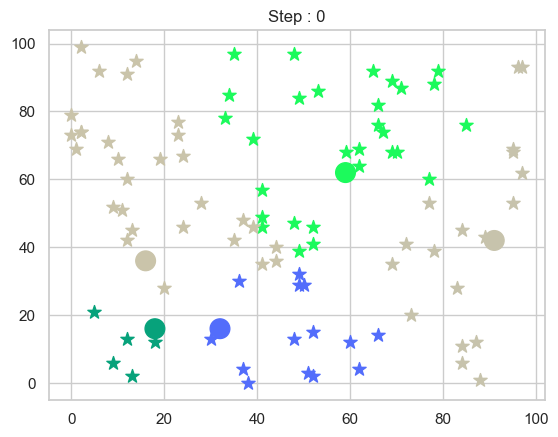

Medoids Changed to: [[32 16]
 [59 62]
 [16 36]
 [91 42]
 [ 8  8]].


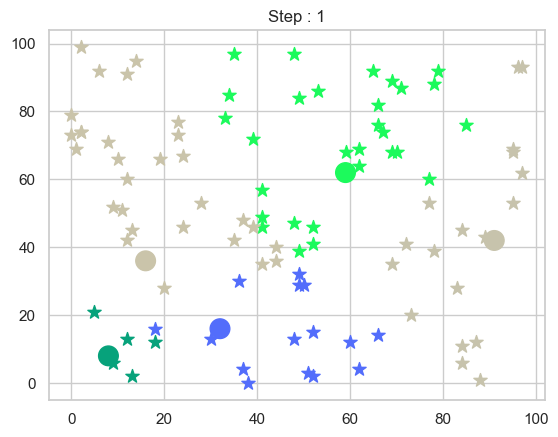

Medoids Changed to: [[32 16]
 [59 62]
 [16 36]
 [91 42]
 [ 9  9]].


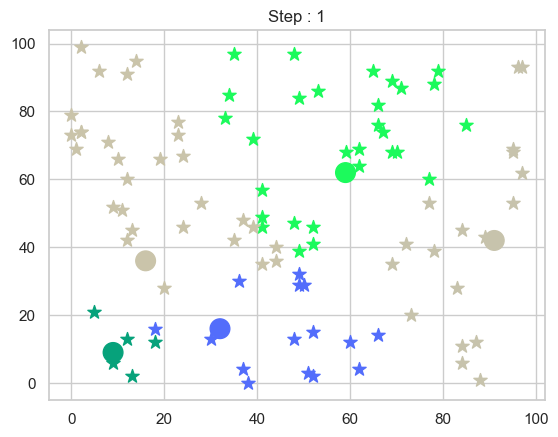

Medoids Changed to: [[32 16]
 [59 62]
 [16 36]
 [91 42]
 [10 10]].


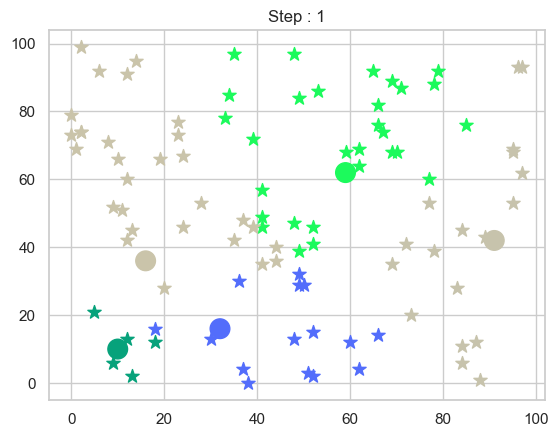

Medoids Changed to: [[32 16]
 [59 62]
 [16 36]
 [91 42]
 [11 11]].


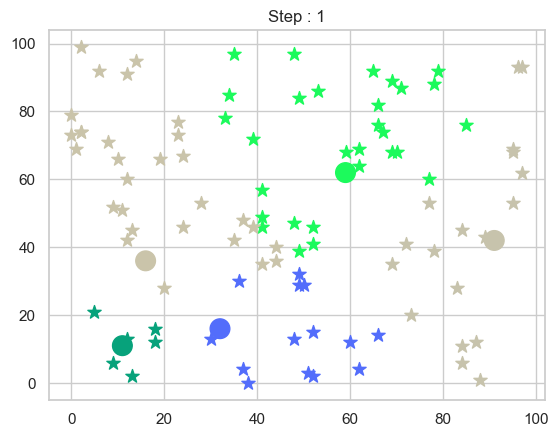

Medoids Changed to: [[32 16]
 [59 62]
 [16 36]
 [91 42]
 [12 12]].


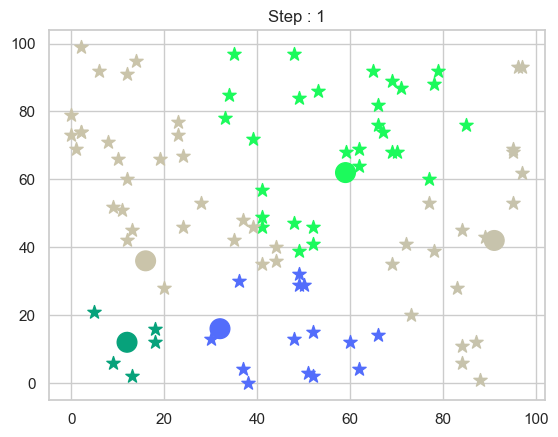

Medoids Changed to: [[32 16]
 [59 62]
 [16 36]
 [91 42]
 [30 30]].


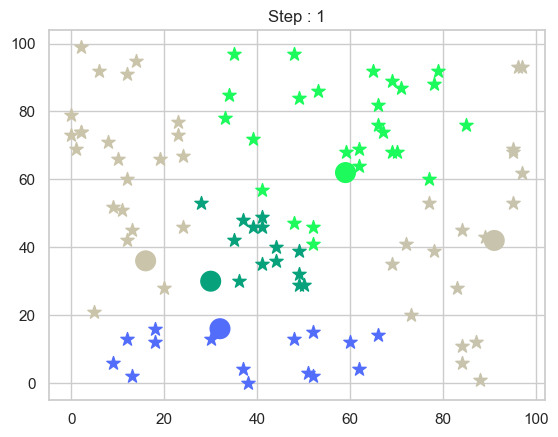

Medoids Changed to: [[32 16]
 [59 62]
 [16 36]
 [91 42]
 [31 31]].


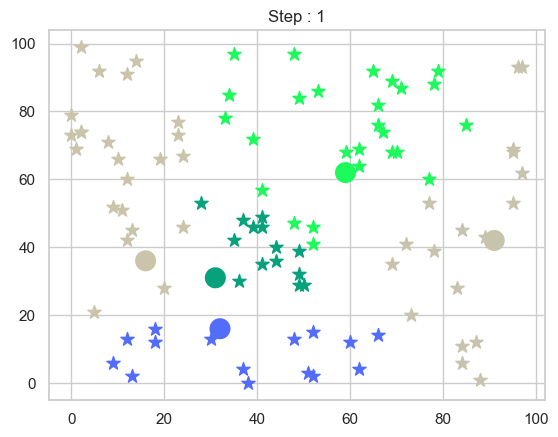

Medoids Changed to: [[32 16]
 [59 62]
 [16 36]
 [91 42]
 [33 33]].


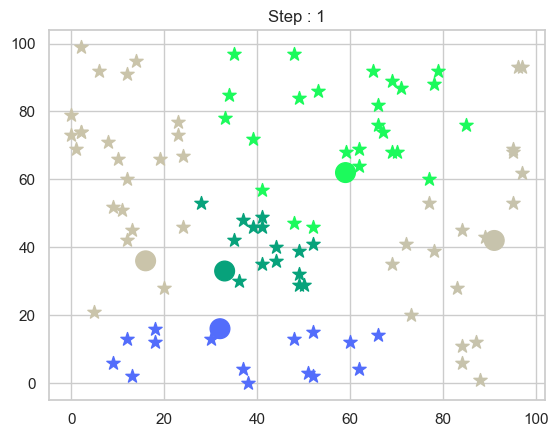

Medoids Changed to: [[32 16]
 [59 62]
 [16 36]
 [91 42]
 [34 34]].


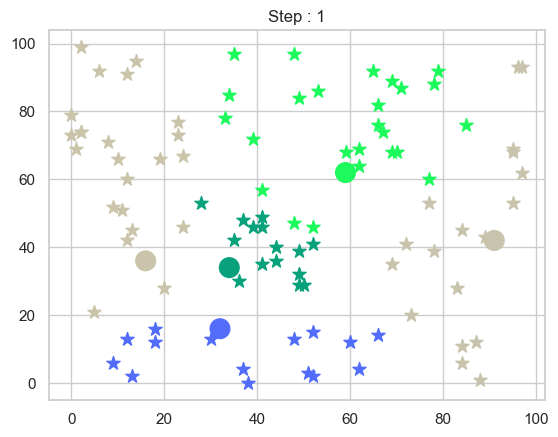

Medoids Changed to: [[32 16]
 [59 62]
 [16 36]
 [91 42]
 [35 35]].


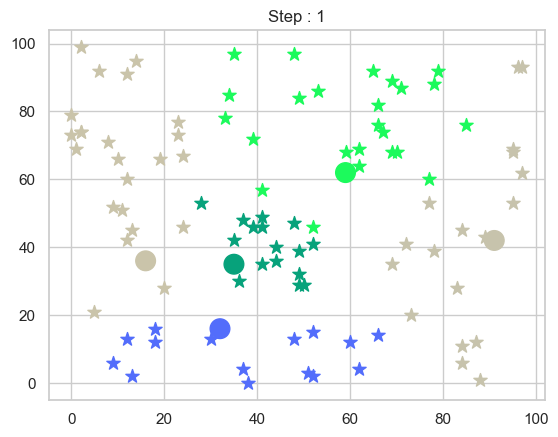

Medoids Changed to: [[32 16]
 [59 62]
 [16 36]
 [91 42]
 [37 37]].


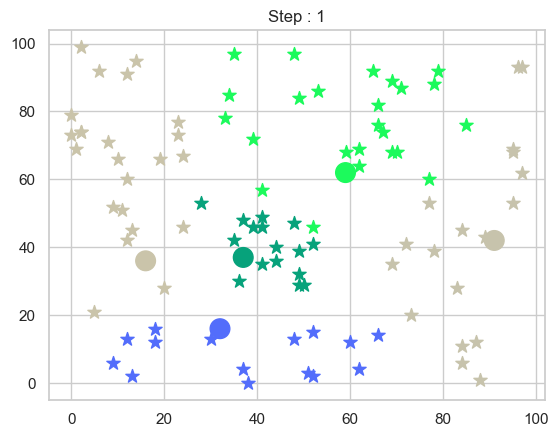

Medoids Changed to: [[32 16]
 [59 62]
 [16 36]
 [91 42]
 [38 38]].


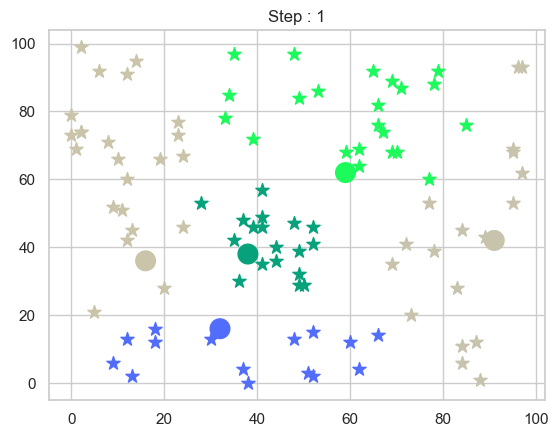

Medoids Changed to: [[32 16]
 [59 62]
 [16 36]
 [91 42]
 [39 39]].


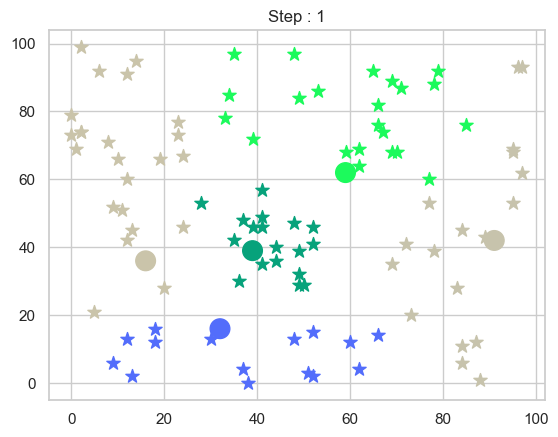

Medoids Changed to: [[32 16]
 [59 62]
 [16 36]
 [91 42]
 [40 40]].


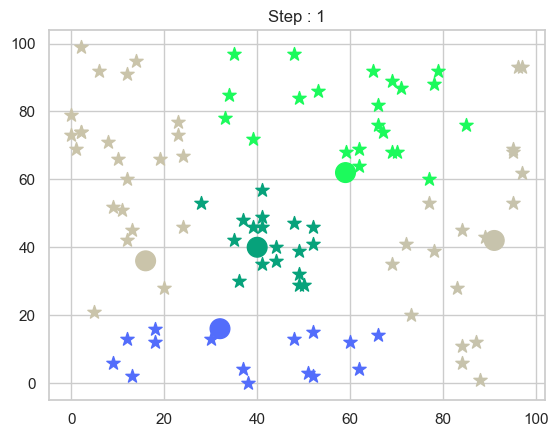

Medoids Changed to: [[32 16]
 [59 62]
 [16 36]
 [91 42]
 [41 41]].


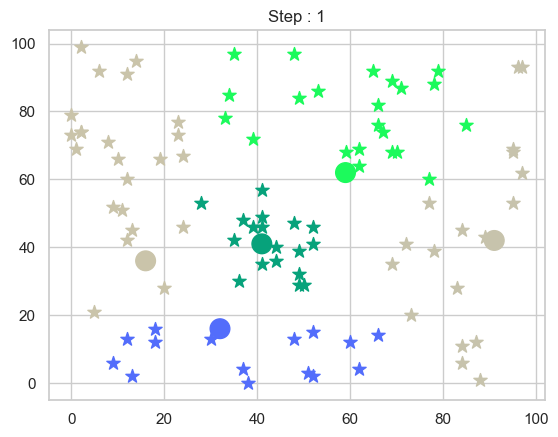

Medoids Changed to: [[32 16]
 [63 63]
 [16 36]
 [91 42]
 [41 41]].


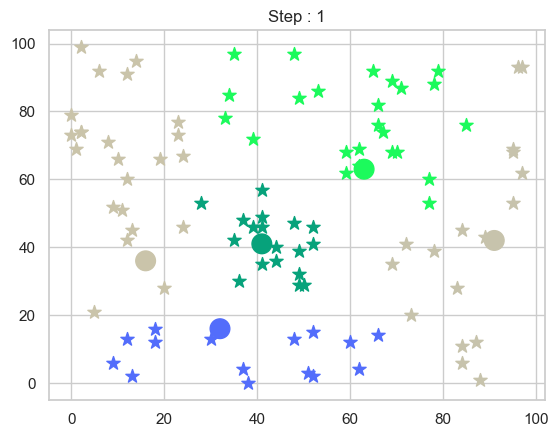

Medoids Changed to: [[32 16]
 [64 64]
 [16 36]
 [91 42]
 [41 41]].


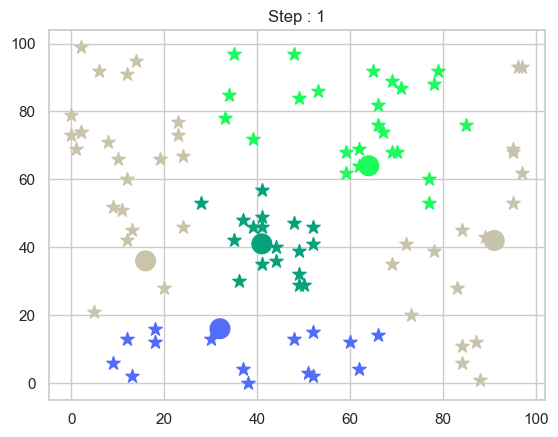

Medoids Changed to: [[32 16]
 [65 65]
 [16 36]
 [91 42]
 [41 41]].


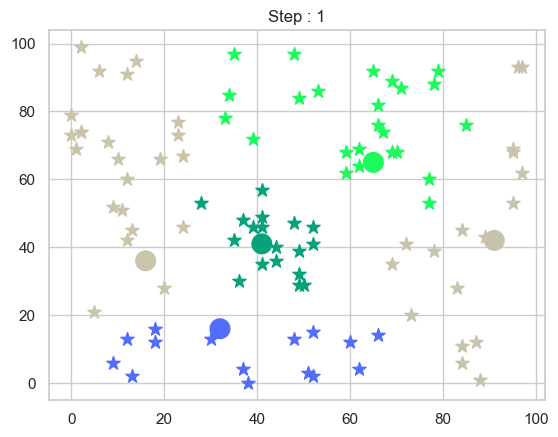

Medoids Changed to: [[32 16]
 [66 66]
 [16 36]
 [91 42]
 [41 41]].


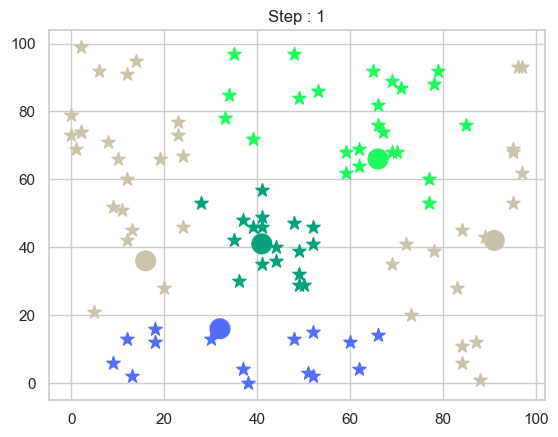

Medoids Changed to: [[32 16]
 [67 67]
 [16 36]
 [91 42]
 [41 41]].


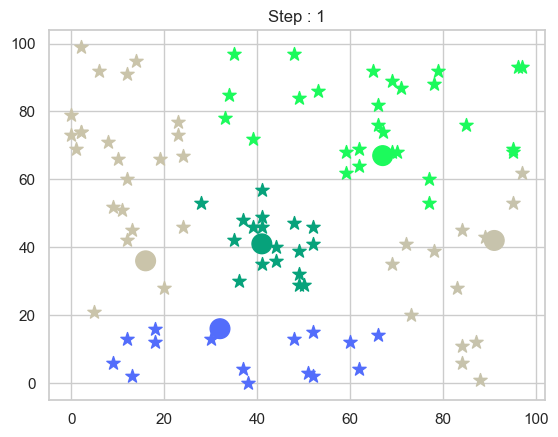

Medoids Changed to: [[32 16]
 [68 68]
 [16 36]
 [91 42]
 [41 41]].


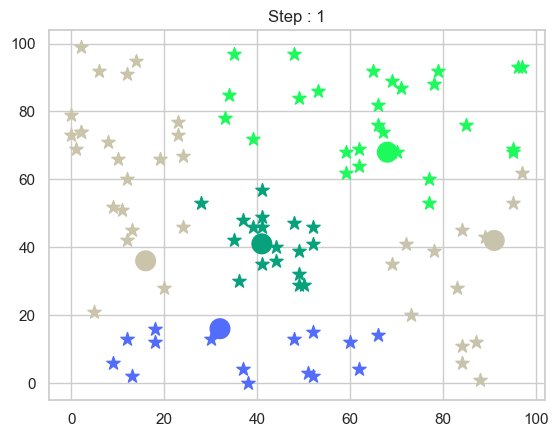

Medoids Changed to: [[32 16]
 [69 69]
 [16 36]
 [91 42]
 [41 41]].


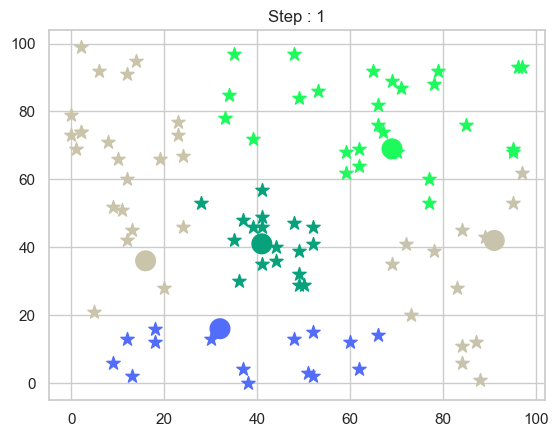

Medoids Changed to: [[32 16]
 [70 70]
 [16 36]
 [91 42]
 [41 41]].


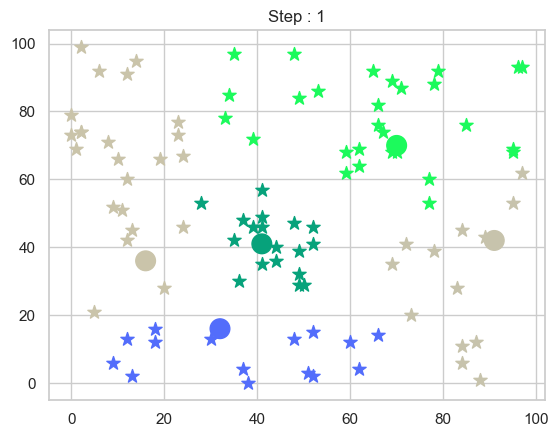

No changes.


In [35]:
dt = np.random.randint(0,100, (100,2))
kmedoid = KMedoidsClass(dt,5,5)
kmedoid.fit()